# Syrtis Demonstration - Starship fluid storage evaluation

In [13]:
from syrtis import *
from syrtis.configuration import Configuration
from syrtis.solver import Solver
from syrtis.material import Solid, ConstrainedIdealGas
from syrtis.habitat import Habitat
from syrtis.tools import *
import numpy as np
import matplotlib.pyplot as plt

### Setup and Configuration
The syrtis modules are imported. A range of solid materials used (aluminium, steel, a generic plastic and open-cell foam) and a range of gases are created. 

The baseline Configuration is created - later, ConfigurationManagers will be used to iterate through a range of habitat temperatures (`T_hab`) to obtain a performance chart.

In [4]:
# Materials definitions
# The absorbivity of perlite and air are assumed as 0.5 but are not required
aluminium = Solid("Aluminium", 247, 2700, 900, absorb=0.15, emit=0.04)
steel = Solid("Dull stainless steel", 45, 7800, 420, absorb=0.50, emit=0.21)
painted_steel = Solid("Painted stainless steel", 45, 7800, 420, absorb=0.55, emit=0.875)
painted_steel_2 = Solid("Painted stainless steel", 45, 7800, 420, absorb=0.2, emit=0.9)
plastic = Solid("Generic plastic", 10, 1300, 1420, absorb=0.89, emit=0.84)
open_cell_foam = Solid("Generic open-cell polyurethane foam", 0.036, 10, 1500, 0.5)

internal_air = ConstrainedIdealGas("STP Air", 101325, 29, 0.71, 17.9e-6, 1010, 0.0252)
martian_air = ConstrainedIdealGas("Martian ambient pressure CO2", 580, 44, 0.71, 10.9e-6, 749, 0.0153)
martian_air_30kpa = ConstrainedIdealGas("CO2, 30kPa", 30e3, 44, 0.71, 10.9e-6, 749, 0.0153)

phlegra_co2 = Configuration("Phlegra Montes, liquid CO2 interior",
 "constant temperature", 210, 0.2, 0.29, 210, 580, 5, "cross", 90, 90, 590, T_habitat=220)
phlegra_cryo = Configuration("Phlegra Montes, liquid cryogen interior",
 "constant temperature", 210, 0.2, 0.29, 210, 580, 5, "cross", 90, 90, 590, T_habitat=100)
phlegra_gas = Configuration("Phlegra Montes, gas interior",
 "constant temperature", 210, 0.2, 0.29, 210, 580, 5, "cross", 90, 90, 590, T_habitat=273)

In [5]:
starship = Habitat(orientation="vertical", length=25, endcap_type="hemisphere")

starship.create_static_shell(internal_air, 4.4968)
starship.create_static_shell(steel, 3.2e-3)
#starship.create_static_shell(martian_air, 50e-3)
#starship.create_static_shell(steel, 0.5e-3)


starship.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*starship.radius_outer))

Diameter of habitat: 9.000000m


In [6]:
white_starship = Habitat(orientation="vertical", length=25, endcap_type="hemisphere")

white_starship.create_static_shell(internal_air, 4.4968)
white_starship.create_static_shell(painted_steel, 3.2e-3)
#starship.create_static_shell(martian_air, 50e-3)
#starship.create_static_shell(steel, 0.5e-3)


white_starship.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*white_starship.radius_outer))

Diameter of habitat: 9.000000m


In [7]:
white_starship2 = Habitat(orientation="vertical", length=25, endcap_type="hemisphere")

white_starship2.create_static_shell(internal_air, 4.4968)
white_starship2.create_static_shell(painted_steel_2, 3.2e-3)
#starship.create_static_shell(martian_air, 50e-3)
#starship.create_static_shell(steel, 0.5e-3)


white_starship2.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*white_starship2.radius_outer))

Diameter of habitat: 9.000000m


## Execution

Configurations for both the vertical and horizontal cases are created and executed

In [9]:
starship_summer_co2 = DayManager(starship, phlegra_co2, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=150,
    T_air_max=254, T_air_min=190, T_ground_max=274, T_ground_min=170, time_air_peak=14, time_ground_peak=13)

starship_winter_co2 = DayManager(starship, phlegra_co2, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=285,
    T_air_max=201, T_air_min=165, T_ground_max=221, T_ground_min=145, time_air_peak=14, time_ground_peak=13)

starship_w_summer_co2 = DayManager(white_starship, phlegra_co2, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=150,
    T_air_max=254, T_air_min=190, T_ground_max=274, T_ground_min=170, time_air_peak=14, time_ground_peak=13)

starship_w_winter_co2 = DayManager(white_starship, phlegra_co2, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=285,
    T_air_max=201, T_air_min=165, T_ground_max=221, T_ground_min=145, time_air_peak=14, time_ground_peak=13)

starship_summer_cryo = DayManager(starship, phlegra_cryo, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=150,
    T_air_max=254, T_air_min=190, T_ground_max=274, T_ground_min=170, time_air_peak=14, time_ground_peak=13)

starship_winter_cryo = DayManager(starship, phlegra_cryo, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=285,
    T_air_max=201, T_air_min=165, T_ground_max=221, T_ground_min=145, time_air_peak=14, time_ground_peak=13)

starship_summer_cryo_w = DayManager(white_starship, phlegra_cryo, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=150,
    T_air_max=254, T_air_min=190, T_ground_max=274, T_ground_min=170, time_air_peak=14, time_ground_peak=13)

starship_winter_cryo_w = DayManager(white_starship, phlegra_cryo, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=285,
    T_air_max=201, T_air_min=165, T_ground_max=221, T_ground_min=145, time_air_peak=14, time_ground_peak=13)

starship_summer_cryo_w2 = DayManager(white_starship2, phlegra_cryo, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=150,
    T_air_max=254, T_air_min=190, T_ground_max=274, T_ground_min=170, time_air_peak=14, time_ground_peak=13)

starship_winter_cryo_w2 = DayManager(white_starship2, phlegra_cryo, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=285,
    T_air_max=201, T_air_min=165, T_ground_max=221, T_ground_min=145, time_air_peak=14, time_ground_peak=13)

starship_summer_gas = DayManager(starship, phlegra_gas, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=150,
    T_air_max=254, T_air_min=190, T_ground_max=274, T_ground_min=170, time_air_peak=14, time_ground_peak=13)

starship_winter_gas = DayManager(starship, phlegra_gas, 48, 
    atmosphere_tau=0.3, latitude=30, areocentric_longitude=285,
    T_air_max=201, T_air_min=165, T_ground_max=221, T_ground_min=145, time_air_peak=14, time_ground_peak=13)


In [10]:
summer_co2_config, summer_co2_heats, summer_co2_reports = starship_summer_co2.run_all_configurations(verbose=True)
winter_co2_config, winter_co2_heats, winter_co2_reports = starship_winter_co2.run_all_configurations(verbose=True)

summer_co2_config_w, summer_co2_heats_w, summer_co2_reports_w = starship_w_summer_co2.run_all_configurations(verbose=True)
winter_co2_config_w, winter_co2_heats_w, winter_co2_reports_w = starship_w_winter_co2.run_all_configurations(verbose=True)

In [75]:
summer_cryo_config, summer_cryo_heats, summer_cryo_reports = starship_summer_cryo.run_all_configurations(verbose=True)
winter_cryo_config, winter_cryo_heats, winter_cryo_reports = starship_winter_cryo.run_all_configurations(verbose=True)

summer_cryo_config_w, summer_cryo_heats_w, summer_cryo_reports_w = starship_summer_cryo_w.run_all_configurations(verbose=True)
winter_cryo_config_w, winter_cryo_heats_w, winter_cryo_reports_w = starship_winter_cryo_w.run_all_configurations(verbose=True)

summer_cryo_config_w2, summer_cryo_heats_w2, summer_cryo_reports_w2 = starship_summer_cryo_w2.run_all_configurations(verbose=True)
winter_cryo_config_w2, winter_cryo_heats_w2, winter_cryo_reports_w2 = starship_winter_cryo_w2.run_all_configurations(verbose=True)

In [ ]:
summer_gas_config, summer_gas_heats, summer_gas_reports = starship_summer_gas.run_all_configurations(verbose=True)
winter_gas_config, winter_gas_heats, winter_gas_reports = starship_winter_gas.run_all_configurations(verbose=True)

In [11]:
print(sum(summer_co2_heats) * 24.65/48 * 3600 / (25*1e8), "J-th")
print(sum(winter_co2_heats) * 24.65/48 * 3600 / (25*1e8), "J-th")


-2.4542738735712097 J-th
-0.7424721455848243 J-th


In [60]:
print(sum(summer_co2_heats_w) * 24.65/48 * 3600 / (25*1e8), "J-th")
print(sum(winter_co2_heats_w) * 24.65/48 * 3600 / (25*1e8), "J-th")


0.2197019867578941 J-th
2.069234744517738 J-th


In [77]:
print(sum(summer_cryo_heats) * 24.65/48 * 3600 / (25*1e8), "J-th")
print(sum(winter_cryo_heats) * 24.65/48 * 3600 / (25*1e8), "J-th")
print(sum(summer_cryo_heats_w) * 24.65/48 * 3600 / (25*1e8), "J-th")
print(sum(winter_cryo_heats_w) * 24.65/48 * 3600 / (25*1e8), "J-th")
print(sum(summer_cryo_heats_w2) * 24.65/48 * 3600 / (25*1e8), "J-th")

-4.507430961437437 J-th
-2.8346886610376303 J-th
-4.718508696846148 J-th
-2.9077681323348705 J-th
-2.335067949488428 J-th


Text(0.5, 1.0, 'Heat flux out of liquid CO2 tanks (summer)')

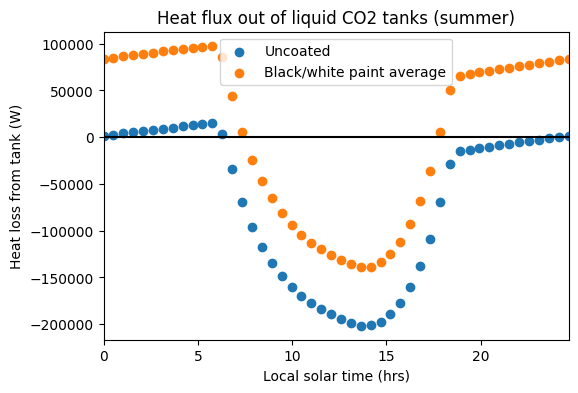

In [12]:
plt.figure(figsize=(6,4))

plt.scatter(starship_summer_co2.times, summer_co2_heats, label="Uncoated")
plt.scatter(starship_winter_co2.times, summer_co2_heats_w, label="Black/white paint average")

plt.axhline(0, color='black')
plt.xlim(0, 24.65)

plt.xlabel("Local solar time (hrs)")
plt.ylabel("Heat loss from tank (W)")
plt.legend()
plt.title("Heat flux out of liquid CO2 tanks (summer)")

Text(0.5, 1.0, 'Heat flux out of cryogen tanks (summer)')

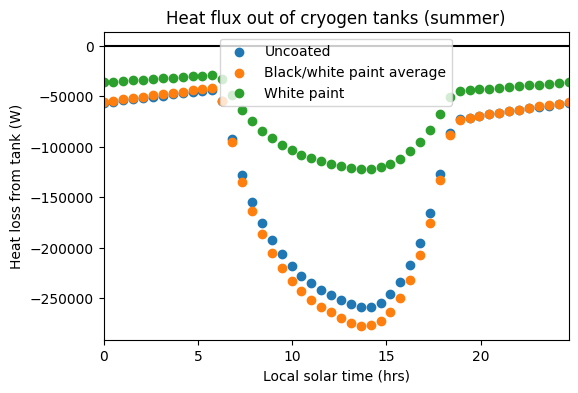

In [76]:
plt.figure(figsize=(6,4))

plt.scatter(starship_summer_cryo.times, summer_cryo_heats, label="Uncoated")
plt.scatter(starship_winter_cryo.times, summer_cryo_heats_w, label="Black/white paint average")
plt.scatter(starship_winter_cryo.times, summer_cryo_heats_w2, label="White paint")

plt.axhline(0, color='black')
plt.xlim(0, 24.65)

plt.xlabel("Local solar time (hrs)")
plt.ylabel("Heat loss from tank (W)")
plt.legend()
plt.title("Heat flux out of cryogen tanks (summer)")

# Analyse a combined geometry

Suppose a toggleable thermal bridge, which turns off heat pipes whenever doing so would reduce heat loss. This can be approximated by switching between the two cases above

In [19]:
switching_heats = []
for time in range(len(starship_summer_cryo.times)):
    switching_heats.append(min(mod_6m_tent_2_heats[time], mod_6m_tent_2b_heats[time], mod_6m_tent_2c_heats[time])) 

Text(0.5, 1.0, 'Daily variation in heat loss from 6m module, summer')

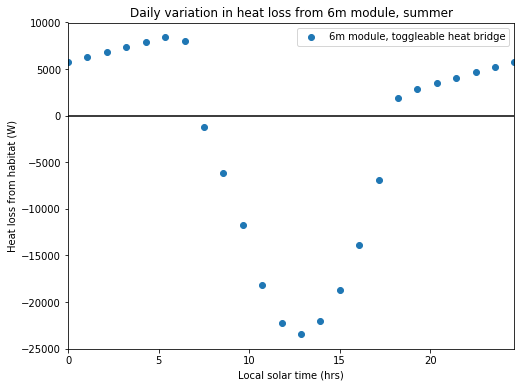

In [20]:
plt.figure(figsize=(8,6))

plt.scatter(mod_6m_summer.times, switching_heats, label="6m module, toggleable heat bridge")


plt.legend()
plt.axhline(0, color='black')
plt.xlim(0, 24.65)

plt.xlabel("Local solar time (hrs)")
plt.ylabel("Heat loss from habitat (W)")
plt.title("Daily variation in heat loss from 6m module, summer")

In [21]:
print(sum(mod_6m_tent_2_heats))
print(sum(mod_6m_tent_2b_heats))
print(sum(mod_6m_tent_2c_heats))
print(sum(switching_heats))

-27950.576346205424
295672.5567839681
-22.72560062364937
-66168.55367913686


In [17]:
plt.figure(figsize=(20,8))
tools.plot_power_balance([summer_co2_heats[12]], 
    labels=["Reflector shield and air gap heat pipe"])

AttributeError: 'numpy.float64' object has no attribute 'keys'

<Figure size 2000x800 with 0 Axes>